In [48]:
# Importing Libraries 

import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import time

dataset = pd.read_csv('E:/Udemy_Machine_Learning_Practical/Directing_Customers_To_Subscription_Through_App_Behavior_Analysis/P39-CS3-Data/new_appdata10_s.csv')


In [49]:
# Data Pre-processing

response = dataset["enrolled"]
dataset.drop(columns = 'enrolled')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, response, test_size = 0.2, random_state = 0)

# Since we don't need the user identifier to train the model but will need it in the end to associate the results with the 
#user for validation, we will separate the column from the training/test data.

train_identifier = X_train["user"]
X_train = X_train.drop(columns = 'user')

test_identifier = X_test["user"]
X_test = X_test.drop(columns = 'user')

In [50]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

X_train = X_train2
X_test = X_test2

In [51]:
# Model Building

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

accuracy_score :  1.0
precision_score :  1.0
recall_score:  1.0
f1_score:  1.0
Test Data Accuracy: 1.0000


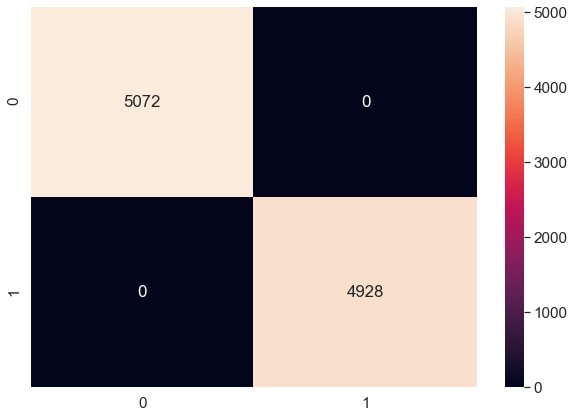

In [52]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

cm = confusion_matrix(y_test, y_pred)
print('accuracy_score : ', accuracy_score(y_test, y_pred))
print('precision_score : ', precision_score(y_test, y_pred))
print('recall_score: ', recall_score(y_test, y_pred))
print('f1_score: ', f1_score(y_test, y_pred))

df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [53]:
# K-fold cross Validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std()*2)
print("Logistic Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

1.0
0.0
Logistic Accuracy: 1.000 (+/- 0.000)


In [54]:
# Model Tuning 

# Grid Search (Round 1)
from sklearn.model_selection import GridSearchCV

# Select Regularization Method
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Combine Parameters
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

Took 12.19 seconds


(1.0, {'C': 0.001, 'penalty': 'l2'})

In [55]:
## Grid Search (Round 2)

# Select Regularization Method
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.1, 0.5, 0.9, 1, 2, 5]

# Combine Parameters
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters
grid_search.best_score_


Took 12.08 seconds


1.0

In [56]:
#### End of Model ####


# Formatting the final Result
final_results = pd.concat([y_test, test_identifier], axis = 1).dropna()
final_results['predicted_results'] = y_pred
#print(final_results)
final_results[['user', 'enrolled', 'predicted_results']].reset_index(drop=True)

,user,enrolled,predicted_results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
...,...,...,...
9995,143036,1,1
9996,91158,1,1
9997,248318,0,0
9998,142418,1,1
